# **데이터크리에이터 캠프 본선**

#### 2020년 10월 17일 이루어진 <a href = 'https://www.nia.or.kr/site/nia_kor/ex/bbs/View.do?cbIdx=99835&bcIdx=22678&parentSeq=22678'>2020년 데이터크리에이터 캠프</a> 1회차 본선 출제문제와 코드

## **본선 출제문제**

**Q. 당신은 분식점을 운영하고 있는 사장이다. 주력 메뉴는 만두, 새우튀김, 순대로 해당 메뉴가 매출에 큰 영향을 미친다. 따라서 주력 메뉴의 리뷰를 각각 관리하기 위해 주력 메뉴의 사진이 있는 리뷰 중 이미지만 모아 이를 분류하는 모델을 만들고자 한다. 만두, 새우튀김, 순대 사진을 분류하는 머신러닝 또는 딥러닝 모델을 만드시오. (데이터셋 별도 제공)**

[공통사항]
- 데이터셋은 머신러닝 데이터와 딥러닝 데이터로 2개가 제공됩니다. 둘은 동일한 데이터입니다.
- 이미지 픽셀값(입력변수)를 통해 만두, 새우튀김, 순대(출력 변수)를 분류하시오.
- Train Data의 개수는 600개(각 Class마다 200장씩), Test Data의 개수는 300개 입니다. Test Data를 예측하여 .npy로 제출해주시기 바랍니다.
- 3개의 Class에 대한 Accuracy로 성능을 평가합니다.

## **EDA**

In [2]:
import os
print(os.getcwd())
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

/content


In [3]:
train_df = pd.read_pickle("train.pkl")
test_df = pd.read_pickle("test.pkl")
train_df.shape, test_df.shape

((600, 3073), (300, 3072))

In [4]:
X_train = train_df.iloc[:, :-1]
y_train = train_df['label']-3

In [5]:
y_train.unique()

array([0, 1, 2], dtype=int32)

### **데이터 확인**

In [6]:
X_train_array = np.array(X_train).reshape(600, 32, 32, 3)

In [ ]:
plt.imshow(X_train_array[0])
plt.show()

In [ ]:
plt.imshow(X_train_array[1])
plt.show()

### **RGB 특성 탐색**

In [9]:
df_label0 = train_df[train_df['label'] == 3].iloc[:, :-1]
df_label1 = train_df[train_df['label'] == 4].iloc[:, :-1]
df_label2 = train_df[train_df['label'] == 5].iloc[:, :-1]

df_label0_array = np.array(df_label0).reshape(200, 32, 32, 3)
df_label1_array = np.array(df_label1).reshape(200, 32, 32, 3)
df_label2_array = np.array(df_label2).reshape(200, 32, 32, 3)

In [ ]:
plt.imshow(df_label0_array[0, :, :, 0], cmap = plt.cm.bone)

In [ ]:
plt.imshow(df_label0_array[0, :, :, 1], cmap = plt.cm.bone)

In [ ]:
plt.imshow(df_label0_array[0, :, :, 2], cmap = plt.cm.bone)

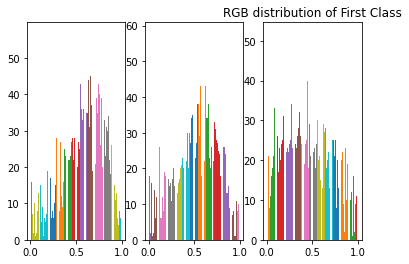

In [48]:
plt.subplot(1, 3, 1)
plt.hist(df_label0_array[:, :, :, 0].reshape(200, 1024))
plt.subplot(1, 3, 2)
plt.hist(df_label0_array[:, :, :, 1].reshape(200, 1024))
plt.subplot(1, 3, 3)
plt.hist(df_label0_array[:, :, :, 2].reshape(200, 1024))

plt.title('RGB distribution of First Class')
plt.show()

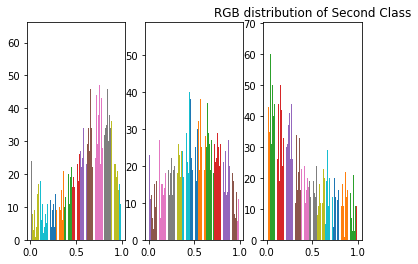

In [14]:
plt.subplot(1, 3, 1)
plt.hist(df_label1_array[:, :, :, 0].reshape(200, 1024))
plt.subplot(1, 3, 2)
plt.hist(df_label1_array[:, :, :, 1].reshape(200, 1024))
plt.subplot(1, 3, 3)
plt.hist(df_label1_array[:, :, :, 2].reshape(200, 1024))

plt.title('RGB distribution of Second Class')
plt.show()

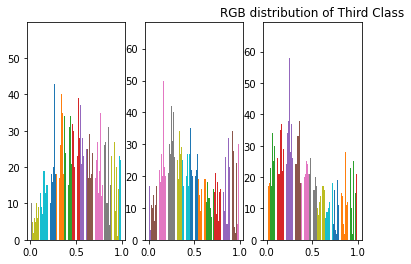

In [15]:
plt.subplot(1, 3, 1)
plt.hist(df_label2_array[:, :, :, 0].reshape(200, 1024))
plt.subplot(1, 3, 2)
plt.hist(df_label2_array[:, :, :, 1].reshape(200, 1024))
plt.subplot(1, 3, 3)
plt.hist(df_label2_array[:, :, :, 2].reshape(200, 1024))

plt.title('RGB distribution of Third Class')
plt.show()

## **Modeling**

#### **Try various machine learning models**

In [16]:
# Logistic Regression, Support Vector Machine, Random Forest, 
# GradientBoost, XGBoost, LightGBM

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

models = [LogisticRegression(multi_class='multinomial'), 
          SVC(), 
          RandomForestClassifier(), 
          GradientBoostingClassifier(),
          XGBClassifier(objective = 'multi:softmax'), 
          LGBMClassifier(objective = 'multiclass')]

names = ['LogisticRegression', 'SVM', 'RandomForest', 
         'GB', 'XGB', 'LGBM']


from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

## Stratified K Fold using label feature
skf = list(StratifiedKFold(n_splits = 5, random_state = 2021).split(train_df, train_df['label'])) 

# define cross validation strategy
def accu_cv(model,X,y):
    acc = np.sqrt(cross_val_score(model, X, y, cv = skf, scoring = 'accuracy'))
    return acc

for name, model in zip(names, models):
    score = accu_cv(model, X_train, y_train)
    print("{}: {:.6f}, {:.4f}\n".format(name, score.mean(), score.std()))

LogisticRegression: 0.844234, 0.0245

SVM: 0.882589, 0.0322

RandomForest: 0.878416, 0.0415

GB: 0.892241, 0.0239

XGB: 0.887313, 0.0318

LGBM: 0.885706, 0.0229



#### **Learn and Check validation scores using Top 4 Classifier**

In [17]:
SEED = 1017

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                  test_size = 0.3, 
                                                  shuffle = True,  
                                                  random_state = SEED)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(420, 3072) (420,)
(180, 3072) (180,)


##### **SVM**

In [18]:
svc = SVC(probability = True, random_state = SEED)
svc_fitted = svc.fit(X_train, y_train)
print(svc_fitted.score(X_val, y_val))

## get val score
svc_val_pred = svc_fitted.predict(X_val)
print(svc_fitted.score(X_val, y_val))
print(classification_report(y_val, svc_val_pred))

## predict
# svc_pred = svc_fitted.predict(test_df)

0.7888888888888889


##### **Gradient Boosting**

In [22]:
from sklearn.metrics import accuracy_score, classification_report

gb = GradientBoostingClassifier(random_state = SEED)
gb_fitted = gb.fit(X_train, y_train)

## get val score
gb_val_pred = gb_fitted.predict(X_val)
print(gb_fitted.score(X_val, y_val))
print(classification_report(y_val, gb_val_pred))

# ## predict
# gb_pred = gb_fitted.predict(test_df)

0.8
              precision    recall  f1-score   support

           0       0.67      0.81      0.73        52
           1       0.88      0.78      0.83        64
           2       0.87      0.81      0.84        64

    accuracy                           0.80       180
   macro avg       0.80      0.80      0.80       180
weighted avg       0.81      0.80      0.80       180



##### **LightGBM**

In [23]:
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier(task = 'train',
                               boosting_type ='gbdt',  
                               objective ='multiclass',
                               save_binary = True,
                               metric ='multi_logloss',
                               random_state = SEED)

lgb_model_fitted = lgb_model.fit(X_train, y_train, 
                                 verbose = False, 
                                 early_stopping_rounds = 50, 
                                 eval_metric = 'multi_logloss', 
                                 eval_set = [(X_train, y_train), (X_val, y_val)], 
                                 eval_names = ['train', 'valid'])

## get val score
lgb_val_pred = lgb_model_fitted.predict(X_val)
print(lgb_model_fitted.score(X_val, y_val))
print(classification_report(y_val, lgb_val_pred))

# ## prediction
# lgb_pred = lgb_model_fitted.predict(test_df)

0.7777777777777778
              precision    recall  f1-score   support

           0       0.63      0.77      0.70        52
           1       0.87      0.75      0.81        64
           2       0.84      0.81      0.83        64

    accuracy                           0.78       180
   macro avg       0.78      0.78      0.78       180
weighted avg       0.79      0.78      0.78       180



##### **XGBoost**

In [24]:
## XGBoost
import xgboost as xgb

xgb_model = xgb.XGBClassifier(booster = 'gbtree',
                              objective = 'multiclass',
                              random_state = SEED,  
                              verbosity = 1)

xgb_model_fitted = xgb_model.fit(X_train, y_train, eval_set = [(X_val, y_val)])
    
## get val score
xg_val_pred = xgb_model_fitted.predict(X_val)
print(xgb_model_fitted.score(X_val, y_val))
print(classification_report(y_val, xg_val_pred))

# #prediction
# xg_pred = xgb_model_fitted.predict(test_df)

[0]	validation_0-merror:0.344444
[1]	validation_0-merror:0.3
[2]	validation_0-merror:0.327778
[3]	validation_0-merror:0.288889
[4]	validation_0-merror:0.283333
[5]	validation_0-merror:0.288889
[6]	validation_0-merror:0.277778
[7]	validation_0-merror:0.266667
[8]	validation_0-merror:0.266667
[9]	validation_0-merror:0.261111
[10]	validation_0-merror:0.288889
[11]	validation_0-merror:0.283333
[12]	validation_0-merror:0.277778
[13]	validation_0-merror:0.283333
[14]	validation_0-merror:0.266667
[15]	validation_0-merror:0.261111
[16]	validation_0-merror:0.255556
[17]	validation_0-merror:0.25
[18]	validation_0-merror:0.261111
[19]	validation_0-merror:0.244444
[20]	validation_0-merror:0.238889
[21]	validation_0-merror:0.233333
[22]	validation_0-merror:0.233333
[23]	validation_0-merror:0.233333
[24]	validation_0-merror:0.233333
[25]	validation_0-merror:0.227778
[26]	validation_0-merror:0.227778
[27]	validation_0-merror:0.233333
[28]	validation_0-merror:0.233333
[29]	validation_0-merror:0.227778

#### **Hard/Soft Voting using Aforementioned classifiers**

##### **Hard Voting**

In [26]:
from sklearn.ensemble import VotingClassifier

hard_voter = VotingClassifier(estimators = [('svc', svc),
                                            ('gb', gb), 
                                            ('xgb', xgb_model)], 
                              voting = 'hard')

hard_voter = hard_voter.fit(X_train, y_train)
print(hard_voter.score(X_val, y_val))

hard_voter_pred = hard_voter.predict(test_df)
# np.save("hard_voter_pred.npy", hard_voter_pred+3)

0.8


##### **Soft Voting**

In [32]:
soft_voter = VotingClassifier(estimators = [('svc', svc),
                                            ('gb', gb), 
                                            ('lgb', lgb_model),
                                            ('xgb', xgb_model)], 
                              voting = 'soft')

soft_voter = soft_voter.fit(X_train, y_train)
print(soft_voter.score(X_val, y_val))

soft_voter_pred = soft_voter.predict(test_df)
# np.save("soft_voter_pred.npy", soft_voter_pred+3)

0.8055555555555556


#### **Stacking using same classifiers**

In [44]:
from mlxtend.classifier import StackingCVClassifier

stacker = StackingCVClassifier(classifiers=[gb, lgb_model, xgb_model],
                               meta_classifier = svc, 
                               verbose = 2, 
                               stratify = skf)


## consider the input shape of StackingCVClassifier => array not dataFrame
stacker.fit(X_train.values, y_train.values)

Fitting 3 classifiers...
Fitting classifier1: gradientboostingclassifier (1/3)
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1017, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
Training and fitting fold 1 of 2...
Training and fitting fold 2 of 2...
Fitting classifier2: lgbmclassifier (2/3)
LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='

StackingCVClassifier(classifiers=[GradientBoostingClassifier(ccp_alpha=0.0,
                                                             criterion='friedman_mse',
                                                             init=None,
                                                             learning_rate=0.1,
                                                             loss='deviance',
                                                             max_depth=3,
                                                             max_features=None,
                                                             max_leaf_nodes=None,
                                                             min_impurity_decrease=0.0,
                                                             min_impurity_split=None,
                                                             min_samples_leaf=1,
                                                             min_samples_split=2,
                                  

In [45]:
stacker.score(X_val.values, y_val.values)

0.7944444444444444

In [ ]:
stacker_pred = stacker.predict(test_df.values)
# np.save("stacker_pred.npy", stacker_pred)